<a href="https://colab.research.google.com/github/RandaAlsubaie/ny/blob/main/MiniProjectWeek7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, we will perform text detection in images using OCR. We will start with image preprocessing and then conduct OCR using Tesseract, EasyOCR, and KerasOCR. By the end of this notebook, you will understand how to enhance image quality for OCR and extract text effectively from images.




# Install and Import Libraries

In [ ]:
!pip install tensorflow==2.9.1 keras==2.9.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 29.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-serve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install easyocr
!pip install keras-ocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.8 MB/s eta 0:00:00


In [ ]:
import cv2
import easyocr
import keras_ocr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
!unzip '/content/drive/MyDrive/untitled folder.zip' -d 'pics'

Archive:  /content/drive/MyDrive/untitled folder.zip
   creating: pics/untitled folder/
  inflating: pics/untitled folder/ckj6oy5ry001d246a6nvzttor.png  
  inflating: pics/__MACOSX/untitled folder/._ckj6oy5ry001d246a6nvzttor.png  
  inflating: pics/untitled folder/ckiflwh74009q246aj1lg7fw8.jpeg  
  inflating: pics/__MACOSX/untitled folder/._ckiflwh74009q246aj1lg7fw8.jpeg  
  inflating: pics/untitled folder/ckieaaxz8007p246a4tbqvsbw.jpeg  
  inflating: pics/__MACOSX/untitled folder/._ckieaaxz8007p246a4tbqvsbw.jpeg  
  inflating: pics/untitled folder/ckn7dir8501jg3068balc54jg.jpeg  
  inflating: pics/__MACOSX/untitled folder/._ckn7dir8501jg3068balc54jg.jpeg  
  inflating: pics/untitled folder/ckn7ceis5015u30685o88h9ds.jpeg  
  inflating: pics/__MACOSX/untitled folder/._ckn7ceis5015u30685o88h9ds.jpeg  
  inflating: pics/untitled folder/ckid0k377002k246aa82z7ygk.jpeg  
  inflating: pics/__MACOSX/untitled folder/._ckid0k377002k246aa82z7ygk.jpeg  
  inflating: pics/untitled folder/ckie6vd9o0

In [ ]:
import os
import pandas as pd

In [ ]:
img_dir = '/content/pics/untitled folder'
car_images = [os.path.join(img_dir, img) for img in os.listdir(img_dir)]
df = pd.DataFrame({'image_path': car_images})
df = df.sample(frac=1).reset_index(drop=True)

# Image Preprocessing

In [ ]:
def display_image(image, title, is_rgb=False):
    if is_rgb:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Text Detection using EasyOCR

In [ ]:
readerAr = easyocr.Reader(['ar'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

In [ ]:
# for img in df['image_path']:
#   image_path = img
#   image = cv2.imread(image_path)
#   resultEn = readerEn.readtext(image)
#   resultAr = readerAr.readtext(image)
#   for detection in resultAr:
#     df['resultAr'] =detection[1]
#   for detection in resultEn:
#    df['resultEn'] = detection[1]




KeyboardInterrupt: 

In [ ]:
image = cv2.imread('/content/pics/untitled folder/ckicuqmuw000h246a6qc5ndoj.jpeg')
resultAr = readerAr.readtext(image)

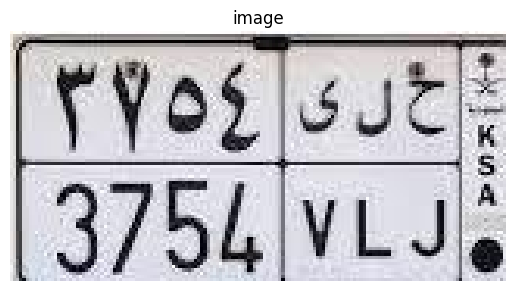

In [ ]:
# image = cv2.imread(image_path)
display_image(image,'image', is_rgb=True)

Print only the detected words

In [ ]:
for detection in resultAr:
    print(detection[1])


خلى ٣٧٥٤
.ل٧٧ 3754


In [ ]:
import re
pattern = re.compile(r'([\u0600-\u06FF])|([\u0660-\u0669])')

for detection in resultAr:
  matches = {string: pattern.search(string) is not None for string in detection[1]}
  print(matches)



{'خ': True, 'ل': True, 'ى': True, ' ': False, '٣': True, '٧': True, '٥': True, '٤': True}
{'.': False, 'ل': True, '٧': True, ' ': False, '3': False, '7': False, '5': False, '4': False}


In [ ]:
for detection in resultEn:
    print(detection[1])

ryeesJr]
3754 VLJI


Draw bounding box

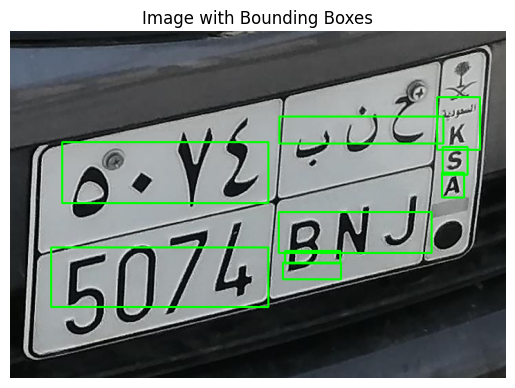

In [ ]:
for detection in resultAr:
    bounding_box = detection[0]

    top_left = tuple([int(coord) for coord in bounding_box[0]])
    bottom_right = tuple([int(coord) for coord in bounding_box[2]])


    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

display_image(image, "Image with Bounding Boxes", is_rgb=True)

# Text Detection using KerasOCR

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
for img in df['image_path']:
  image_path = img
  image = cv2.imread(image_path)
  image = keras_ocr.tools.read(image)

images = [image]
prediction_groups = pipeline.recognize(images)

for predictions in prediction_groups:
    for prediction in predictions:
        print(prediction[0])

1/1 [==============================] - 5s 5s/step
lrn
as
s
ooys
bnji
50741


KerasOCR provides a built-in method `keras_ocr.tools.drawAnnotations()` that simplifies the process of drawing bounding boxes and displaying text annotations on images.

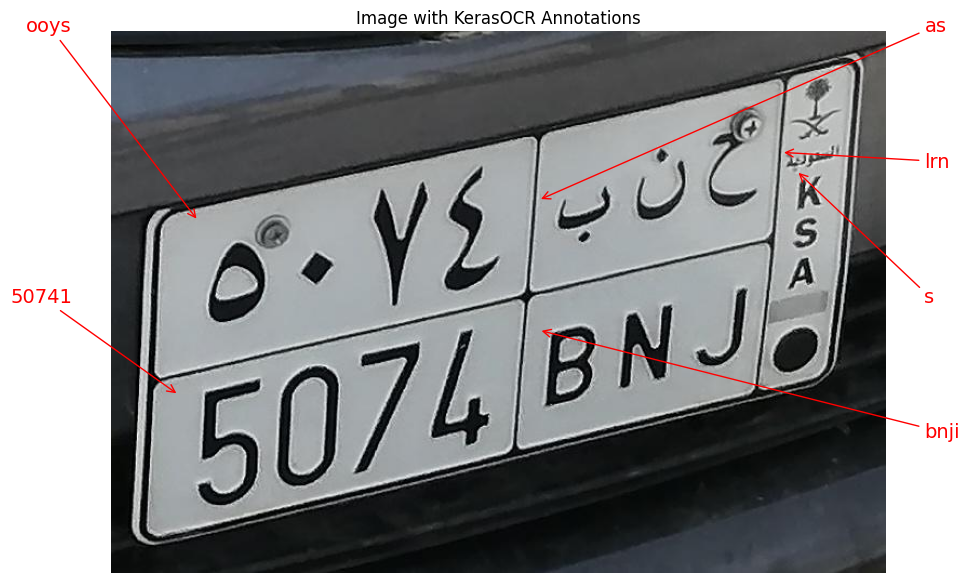

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0], ax=ax)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.title("Image with KerasOCR Annotations")
plt.axis('off')
plt.imshow(image)